# Task 1: Introduction

---

For this project, we are going to work on evaluating price of houses given the following features:

1. Year of sale of the house
2. The age of the house at the time of sale
3. Distance from city center
4. Number of stores in the locality
5. The latitude
6. The longitude


Note: This notebook uses `python 3` and these packages: `tensorflow`, `pandas`, `matplotlib`, `scikit-learn`.

## 1.1: Importing Libraries & Helper Functions

First of all, we will need to import some libraries and helper functions. This includes TensorFlow and some utility functions that I've written to save time.

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf


from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback
import matplotlib.pyplot as plt

%matplotlib inline
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

print('Libraries imported.')

Libraries imported.


# Task 2: Importing the Data

## 2.1: Importing the Data

The dataset is saved in a `data.csv` file. We will use `pandas` to take a look at some of the rows.

In [39]:
df = pd.read_csv('data.csv', names= ['serial','date','age','distance','stores','latitude','longitude','price']) 
df.head()

,serial,date,age,distance,stores,latitude,longitude,price
0,0,2009,21,9,6,84,121,14264
1,1,2007,4,2,3,86,121,12032
2,2,2016,18,3,7,90,120,13560
3,3,2002,13,2,2,80,128,12029
4,4,2014,25,5,8,81,122,14157


## 2.2: Check Missing Data



In [40]:
df.isna().sum()

serial       0
date         0
age          0
distance     0
stores       0
latitude     0
longitude    0
price        0
dtype: int64

# Task 3: Data Normalization

## 3.1: Data Normalization



In [41]:
df = df.iloc[:,1:]
df_norm = (df - df.mean()) / df.std()
df_norm.head()

,date,age,distance,stores,latitude,longitude,price
0,0.015978,0.181384,1.257002,0.345224,-0.307212,-1.260799,0.350088
1,-0.350485,-1.319118,-0.930610,-0.609312,0.325301,-1.260799,-1.836486
2,1.298598,-0.083410,-0.618094,0.663402,1.590328,-1.576456,-0.339584
3,-1.266643,-0.524735,-0.930610,-0.927491,-1.572238,0.948803,-1.839425
4,0.932135,0.534444,0.006938,0.981581,-1.255981,-0.945141,0.245266


## 3.2: Convert Label Value

Because we are using normalized values for the labels, we will get the predictions back from a trained model in the same distribution. So, we need to convert the predicted values back to the original distribution if we want predicted prices.We write down a function here so that we can use this function to get back to original Label Value using this function. 

In [42]:
y_mean = df['price'].mean()
y_std = df['price'].std()

def convert_label_value(pred):
    return int(pred * y_std + y_mean)

# Task 4: Create Training and Test Sets

## 4.1: Select Features


In [43]:
X = df_norm.iloc[:, :6]
X.head()

,date,age,distance,stores,latitude,longitude
0,0.015978,0.181384,1.257002,0.345224,-0.307212,-1.260799
1,-0.350485,-1.319118,-0.930610,-0.609312,0.325301,-1.260799
2,1.298598,-0.083410,-0.618094,0.663402,1.590328,-1.576456
3,-1.266643,-0.524735,-0.930610,-0.927491,-1.572238,0.948803
4,0.932135,0.534444,0.006938,0.981581,-1.255981,-0.945141


## 4.2: Select Labels

In [44]:
Y = df_norm.iloc[:, -1]
Y.head()

0    0.350088
1   -1.836486
2   -0.339584
3   -1.839425
4    0.245266
Name: price, dtype: float64

## 4.3: Feature and Label Values

We will need to extract just the numeric values for the features and labels as the TensorFlow model will expect just numeric values as input.

In [45]:
X_arr = X.values
Y_arr = Y.values

print('X_arr shape: ', X_arr.shape)
print('Y_arr shape: ', Y_arr.shape)

X_arr shape:  (5000, 6)
Y_arr shape:  (5000,)


## 4.4: Train and Test Split

We will keep some part of the data aside as a __test__ set. The model will not use this set during training and it will be used only for checking the performance of the model in trained and un-trained states. This way, we can make sure that we are going in the right direction with our model training.

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_arr, Y_arr, test_size = 0.05, shuffle = True, random_state=0)

print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (4750, 6)
y_train shape:  (4750,)
X_test shape:  (250, 6)
y_test shape:  (250,)


# Task 5: Create the Model

## 5.1: Create the Model

Now writing a function that returns an untrained model with three hidden layers which are densely connected.

In [75]:
def get_model():
    
    model = Sequential([
        Dense(10, input_shape = (6,), activation = 'relu'),
        Dense(20, activation = 'relu'),
        Dense(5, activation = 'relu'),
        Dense(1) 
    ])
    #relu = Rectified Linear Activation Unit
    model.compile(
        loss='mse',
        optimizer='adam',
        metrics=[accuracy]    
        )
    #mse -> mean square error
    
    return model

model = get_model()
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_76 (Dense)             (None, 10)                70        
_________________________________________________________________
dense_77 (Dense)             (None, 20)                220       
_________________________________________________________________
dense_78 (Dense)             (None, 5)                 105       
_________________________________________________________________
dense_79 (Dense)             (None, 1)                 6         
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


# Task 6: Model Training

## 6.1: Model Training

We are using an `EarlyStopping` callback from Keras to stop the model training if the validation loss stops decreasing for a few epochs.

In [67]:
early_stopping = EarlyStopping(monitor='val_loss', patience = 5)

model = get_model()

preds_on_untrained = model.predict(X_test)


history = model.fit(
    X_train, y_train,
    validation_data = (X_test, y_test),
    epochs = 100,
    callbacks = [early_stopping]
)


#print(history.history['accuracy'])

Epoch 1/100
149/149 [==============================] - 0s 2ms/step - loss: 0.6894 - soft_acc: 0.4499 - val_loss: 0.3943 - val_soft_acc: 0.5556
Epoch 2/100
149/149 [==============================] - 0s 1ms/step - loss: 0.3436 - soft_acc: 0.5612 - val_loss: 0.2510 - val_soft_acc: 0.5956
Epoch 3/100
149/149 [==============================] - 0s 1ms/step - loss: 0.2496 - soft_acc: 0.6052 - val_loss: 0.1989 - val_soft_acc: 0.6364
Epoch 4/100
149/149 [==============================] - 0s 1ms/step - loss: 0.2047 - soft_acc: 0.6330 - val_loss: 0.1737 - val_soft_acc: 0.6812
Epoch 5/100
149/149 [==============================] - 0s 1ms/step - loss: 0.1852 - soft_acc: 0.6444 - val_loss: 0.1665 - val_soft_acc: 0.6899
Epoch 6/100
149/149 [==============================] - 0s 1ms/step - loss: 0.1751 - soft_acc: 0.6503 - val_loss: 0.1619 - val_soft_acc: 0.6782
Epoch 7/100
149/149 [==============================] - 0s 1ms/step - loss: 0.1698 - soft_acc: 0.6543 - val_loss: 0.1578 - val_soft_acc: 0.6821

## 6.2: Plot Training Loss and Validation Loss

Now, we will  use the `plot_loss`  function (written on  `utils.py` file) to take a look training and validation loss.

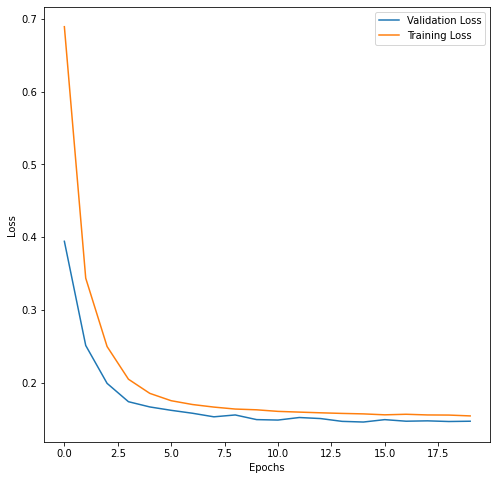

In [68]:
def plot_loss(history):
    h = history.history
    x_lim = len(h['loss'])
    plt.figure(figsize=(8, 8))
    plt.plot(range(x_lim), h['val_loss'], label = 'Validation Loss')
    plt.plot(range(x_lim), h['loss'], label = 'Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    return
    
plot_loss(history)

# Task 7: Predictions

Now, at first we are wrtting a function which `compare_predictions` helper function to compare predictions from the model when it was untrained and when it was trained.

In [69]:
def compare_predictions(preds1, preds2, y_test):
    plt.figure(figsize=(8, 8))
    plt.plot(preds1, y_test, 'ro', label='Untrained Model')
    plt.plot(preds2, y_test, 'go', label='Trained Model')
    plt.xlabel('Preds')
    plt.ylabel('Labels')
    
    y_min = min(min(y_test), min(preds1), min(preds2))
    y_max = max(max(y_test), max(preds1), max(preds2))
    
    plt.xlim([y_min, y_max])
    plt.ylim([y_min, y_max])
    plt.plot([y_min, y_max], [y_min, y_max], 'b--')
    plt.legend()
    plt.show()
    return

## 7.1: Plot Raw Predictions


And than using this function we will show the comparison.

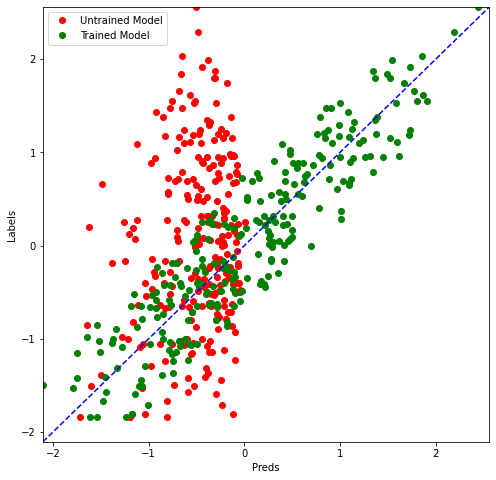

In [70]:
preds_on_trained = model.predict(X_test)

compare_predictions(preds_on_untrained, preds_on_trained, y_test)

## 7.2: Plot Original Price Predictions

The plot for price predictions and raw predictions will look the same with just one difference: The x and y axis scale is changed. Here we will first convert the label values( y value) to its original form using the `convert_label_values` function written on `section 3.2`

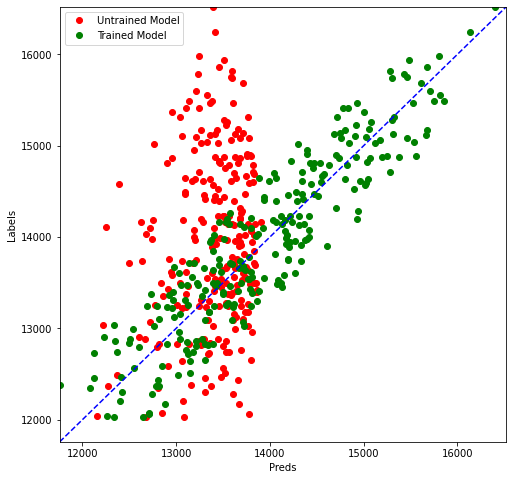

In [71]:
price_on_untrained = [convert_label_value(y) for y in preds_on_untrained]
price_on_trained = [convert_label_value(y) for y in preds_on_trained]
price_y_test = [convert_label_value(y) for y in y_test]



compare_predictions(price_on_untrained, price_on_trained, price_y_test)

In [93]:
import numpy as np
from sklearn import metrics
y_pred = np.array(preds_on_trained)
y_true = np.array(price_y_test)


print("Mean Absolute Error (MAE): ",metrics.mean_absolute_error(y_true, y_pred))
print("Mean Squared Error (MSE): ",metrics.mean_squared_error(y_true, y_pred))
print("Root Mean Squared Error (RMSE): ",np.sqrt(metrics.mean_squared_error(y_true, y_pred)))

Mean Absolute Error (MAE):  13945.525791986227
Mean Squared Error (MSE):  195376690.70965487
Root Mean Squared Error (RMSE):  13977.721227355154
